Saving cardio_train.csv to cardio_train (2).csv
Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.72      0.75      0.73      6988
           1       0.74      0.70

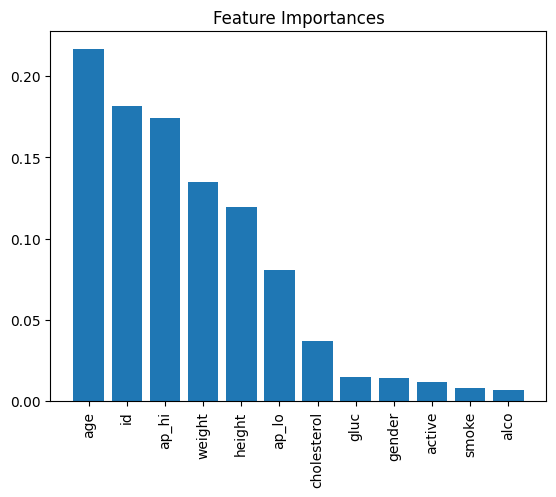

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
df = pd.read_csv('cardio_train.csv', sep=';')
print(df.columns)
print(df.head())

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

X = df.drop('cardio', axis=1)
y = df['cardio']

scaler = StandardScaler()
X[['age', 'height', 'weight', 'ap_hi', 'ap_lo']] = scaler.fit_transform(X[['age', 'height', 'weight', 'ap_hi', 'ap_lo']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

importance = model.feature_importances_
indices = np.argsort(importance)[::-1]

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importance[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()